In [20]:
import librosa
from librosa import display
import numpy as np

In [22]:
import time
import os
path = 'C:/Users/Fabeha fatima/Anaconda3/spede/feature'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 532.184247970581 seconds ---


In [24]:

# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [26]:
import numpy as np
X = np.asarray(X)
y = np.asarray(y)


X.shape, y.shape

((13978, 40), (13978,))

In [28]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = 'cnn'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [30]:
import joblib
X = joblib.load('cnn/X.joblib')
y = joblib.load('cnn/y.joblib')

In [32]:
#descion tree 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier


In [34]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
predictions = dtree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       581
           1       0.79      0.81      0.80       175
           2       0.92      0.90      0.91       684
           3       0.90      0.92      0.91       697
           4       0.93      0.95      0.94       675
           5       0.91      0.91      0.91       668
           6       0.93      0.90      0.92       572
           7       0.91      0.92      0.92       561

    accuracy                           0.92      4613
   macro avg       0.91      0.91      0.91      4613
weighted avg       0.92      0.92      0.92      4613



In [ ]:
#neural networks 

import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

x_traincnn.shape, x_testcnn.shape

In [39]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'rmsprop'

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_9 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_10 (Activation)   (None, 10, 128)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 128)          

In [43]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

NameError: name 'opt' is not defined

In [23]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Train on 3518 samples, validate on 1734 samples
Epoch 1/200
3518/3518 [==============================] - 5s 1ms/step - loss: 4.5226 - accuracy: 0.1589 - val_loss: 1.8157 - val_accuracy: 0.3068
Epoch 2/200
3518/3518 [==============================] - 2s 581us/step - loss: 2.6944 - accuracy: 0.2428 - val_loss: 1.5469 - val_accuracy: 0.4619
Epoch 3/200
3518/3518 [==============================] - 2s 544us/step - loss: 2.0525 - accuracy: 0.3599 - val_loss: 1.5228 - val_accuracy: 0.4435
Epoch 4/200
3518/3518 [==============================] - 2s 503us/step - loss: 1.7633 - accuracy: 0.4090 - val_loss: 1.3575 - val_accuracy: 0.5755
Epoch 5/200
3518/3518 [==============================] - 2s 551us/step - loss: 1.5793 - accuracy: 0.4602 - val_loss: 1.2796 - val_accuracy: 0.5750
Epoch 6/200
3518/3518 [==============================] - 2s 494us/step - loss: 1.4521 - accuracy: 0.5037 - val_loss: 1.1745 - val_accuracy: 0.6280
Epoch 7/200
3518/3518 [==============================] - 2s 586us/step -

3518/3518 [==============================] - 2s 531us/step - loss: 0.5990 - accuracy: 0.7786 - val_loss: 0.6338 - val_accuracy: 0.7624
Epoch 57/200
3518/3518 [==============================] - 2s 544us/step - loss: 0.5885 - accuracy: 0.7783 - val_loss: 0.6257 - val_accuracy: 0.7653
Epoch 58/200
3518/3518 [==============================] - 2s 483us/step - loss: 0.5791 - accuracy: 0.7882 - val_loss: 0.6176 - val_accuracy: 0.7699
Epoch 59/200
3518/3518 [==============================] - 2s 516us/step - loss: 0.5750 - accuracy: 0.7862 - val_loss: 0.6185 - val_accuracy: 0.7682
Epoch 60/200
3518/3518 [==============================] - 2s 504us/step - loss: 0.5813 - accuracy: 0.7806 - val_loss: 0.6297 - val_accuracy: 0.7641
Epoch 61/200
3518/3518 [==============================] - 2s 481us/step - loss: 0.5662 - accuracy: 0.7885 - val_loss: 0.6196 - val_accuracy: 0.7722
Epoch 62/200
3518/3518 [==============================] - 2s 483us/step - loss: 0.5777 - accuracy: 0.7845 - val_loss: 0.6211 

3518/3518 [==============================] - 2s 504us/step - loss: 0.4265 - accuracy: 0.8425 - val_loss: 0.5217 - val_accuracy: 0.8137
Epoch 112/200
3518/3518 [==============================] - 2s 591us/step - loss: 0.4031 - accuracy: 0.8516 - val_loss: 0.5125 - val_accuracy: 0.8137
Epoch 113/200
3518/3518 [==============================] - 2s 520us/step - loss: 0.4134 - accuracy: 0.8474 - val_loss: 0.5166 - val_accuracy: 0.8080
Epoch 114/200
3518/3518 [==============================] - 2s 511us/step - loss: 0.4147 - accuracy: 0.8414 - val_loss: 0.5194 - val_accuracy: 0.8062
Epoch 115/200
3518/3518 [==============================] - 2s 488us/step - loss: 0.4144 - accuracy: 0.8488 - val_loss: 0.5274 - val_accuracy: 0.8126
Epoch 116/200
3518/3518 [==============================] - 2s 480us/step - loss: 0.4041 - accuracy: 0.8493 - val_loss: 0.5217 - val_accuracy: 0.8074
Epoch 117/200
3518/3518 [==============================] - 2s 546us/step - loss: 0.4124 - accuracy: 0.8493 - val_loss: 0

3518/3518 [==============================] - 2s 545us/step - loss: 0.3165 - accuracy: 0.8869 - val_loss: 0.4947 - val_accuracy: 0.8235
Epoch 167/200
3518/3518 [==============================] - 2s 517us/step - loss: 0.3161 - accuracy: 0.8872 - val_loss: 0.4884 - val_accuracy: 0.8293
Epoch 168/200
3518/3518 [==============================] - 2s 506us/step - loss: 0.3166 - accuracy: 0.8852 - val_loss: 0.4892 - val_accuracy: 0.8230
Epoch 169/200
3518/3518 [==============================] - 2s 483us/step - loss: 0.3190 - accuracy: 0.8852 - val_loss: 0.4905 - val_accuracy: 0.8230
Epoch 170/200
3518/3518 [==============================] - 2s 483us/step - loss: 0.3084 - accuracy: 0.8889 - val_loss: 0.4765 - val_accuracy: 0.8345
Epoch 171/200
3518/3518 [==============================] - 2s 489us/step - loss: 0.2979 - accuracy: 0.8900 - val_loss: 0.4839 - val_accuracy: 0.8247
Epoch 172/200
3518/3518 [==============================] - 2s 493us/step - loss: 0.3060 - accuracy: 0.8883 - val_loss: 0

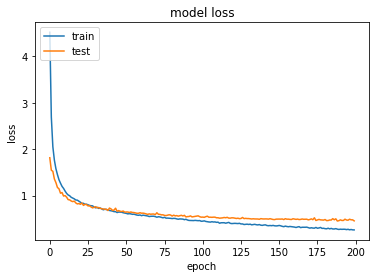

In [24]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
predictions = model.predict_classes(x_testcnn)
predictions

array([5, 5, 1, ..., 6, 7, 3], dtype=int64)

In [26]:
y_test

array([5, 5, 2, ..., 6, 7, 3])

In [27]:
new_Ytest = y_test.astype(int)
new_Ytest

array([5, 5, 2, ..., 6, 7, 3])

In [28]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       190
           1       0.78      0.65      0.71       113
           2       0.88      0.83      0.86       241
           3       0.85      0.82      0.83       274
           4       0.88      0.89      0.88       257
           5       0.77      0.87      0.82       242
           6       0.86      0.80      0.83       215
           7       0.84      0.81      0.82       202

    accuracy                           0.84      1734
   macro avg       0.83      0.82      0.83      1734
weighted avg       0.84      0.84      0.83      1734



In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[175   4   0   9   0   2   0   0]
 [ 13  73   9  10   1   4   2   1]
 [  2   8 201   1  11   8   4   6]
 [  8   4   3 225   4  20   3   7]
 [  1   1   5   2 229  10   7   2]
 [  5   2   3  10   1 211   5   5]
 [  5   1   2   7   9   9 172  10]
 [  8   1   5   2   6   9   8 163]]


In [30]:
model.save('cnn/testing10_model.h5')
print("MODEL SAVED")


MODEL SAVED


In [31]:

new_model=keras.models.load_model('cnn/testing10_model.h5')
new_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)          

In [32]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1734/1734 [==============================] - 0s 96us/step
Restored model, accuracy: 83.56%
